# Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station 
```python (station_name == 'Wilson')``` when riding Chicago's public transportation system on weekdays 
```python(day_type == 'Weekday') ``` in July ```python (month == 7) ```. Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

The *cal*, *ridership*, and *stations* DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below.

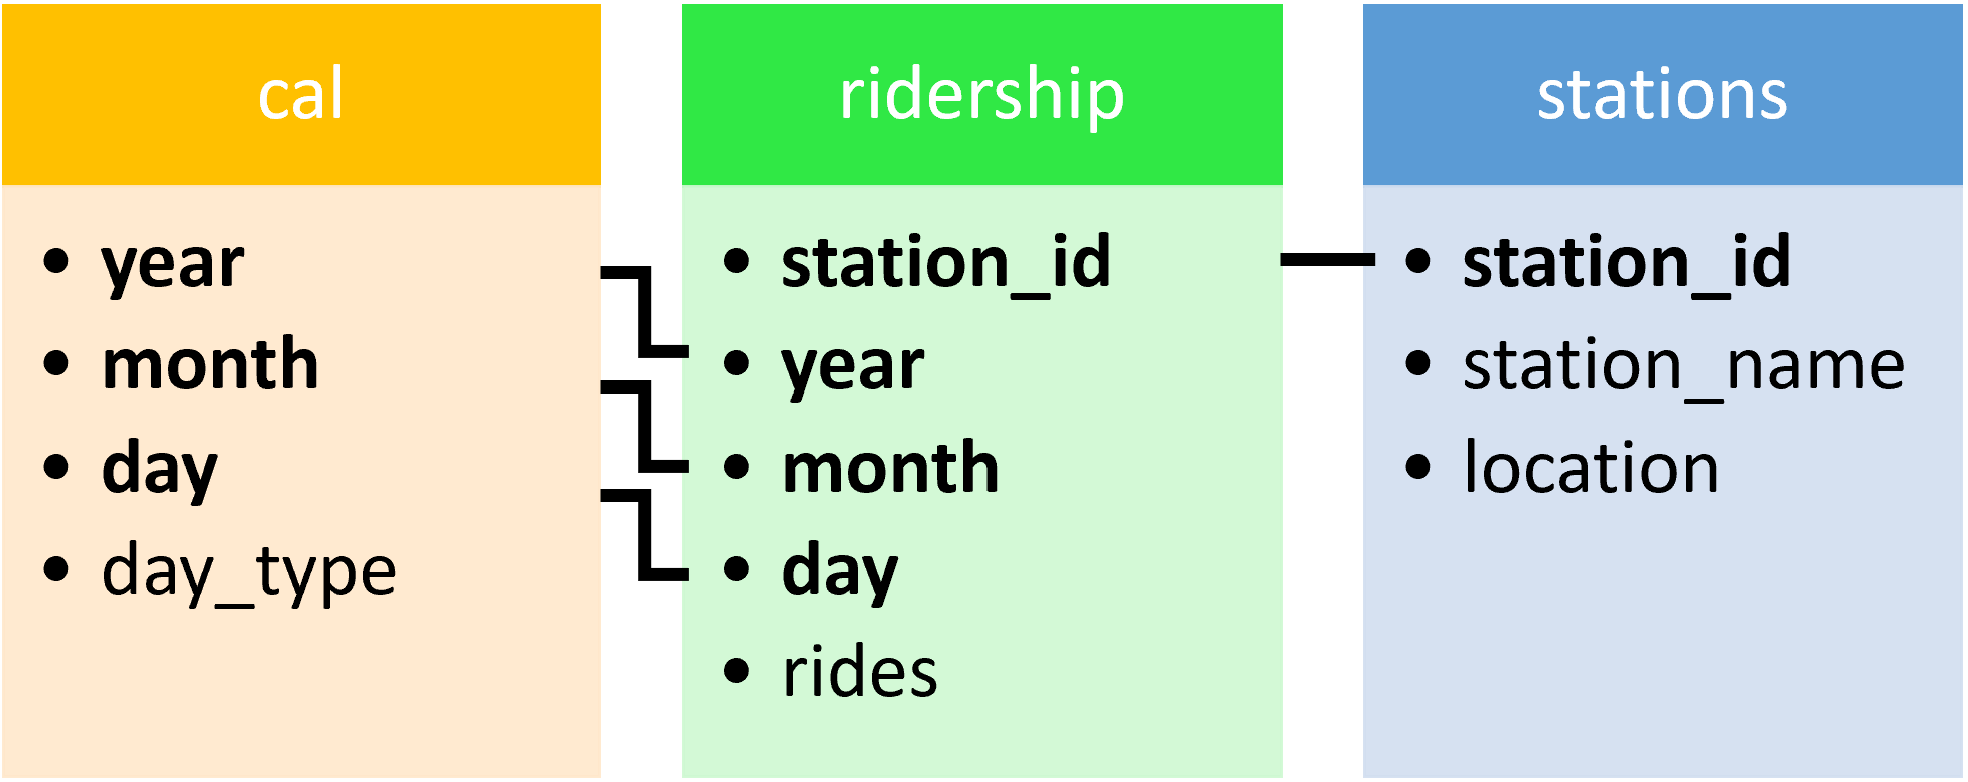

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
path=r'/media/documentos/Cursos/Data Science/Python/Data_Science_Python/data_sets/'

cal=pd.read_pickle(path+'cta_calendar.p')
print(cal.head(),'\n')

ridership=pd.read_pickle(path+'cta_ridership.p')
print(ridership.head(),'\n')

stations=pd.read_pickle(path+'stations.p')
print(stations.head(),'\n')


   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday 

  station_id  year  month  day  rides
0      40010  2019      1    1    576
1      40010  2019      1    2   1457
2      40010  2019      1    3   1543
3      40010  2019      1    4   1621
4      40010  2019      1    5    719 

  station_id        station_name                 location
0      40010  Austin-Forest Park  (41.870851, -87.776812)
1      40020         Harlem-Lake  (41.886848, -87.803176)
2      40030        Pulaski-Lake  (41.885412, -87.725404)
3      40040        Quincy/Wells   (41.878723, -87.63374)
4      40050               Davis   (42.04771, -87.683543) 



Merge the *ridership* and *cal* tables together, starting with the *ridership* table on the left and save the result to the variable *ridership_cal*. If you code takes too long to run, your merge conditions might be incorrect.

In [3]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal,on=['year','month','day'])
print(ridership_cal.head(5))

  station_id  year  month  day  rides        day_type
0      40010  2019      1    1    576  Sunday/Holiday
1      40080  2019      1    1   1839  Sunday/Holiday
2      40770  2019      1    1   2724  Sunday/Holiday
3      40120  2019      1    1    754  Sunday/Holiday
4      40540  2019      1    1   2175  Sunday/Holiday


- Extend the previous merge to three tables by also merging the *stations* table.

In [4]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
                                  .merge (stations,on='station_id')
print(ridership_cal_stations.head(5))

  station_id  year  month  day  rides        day_type        station_name  \
0      40010  2019      1    1    576  Sunday/Holiday  Austin-Forest Park   
1      40010  2019      1    2   1457         Weekday  Austin-Forest Park   
2      40010  2019      1    3   1543         Weekday  Austin-Forest Park   
3      40010  2019      1    4   1621         Weekday  Austin-Forest Park   
4      40010  2019      1    5    719        Saturday  Austin-Forest Park   

                  location  
0  (41.870851, -87.776812)  
1  (41.870851, -87.776812)  
2  (41.870851, -87.776812)  
3  (41.870851, -87.776812)  
4  (41.870851, -87.776812)  


- Create a variable called *filter_criteria* to select the appropriate rows from the merged table so that you can sum the rides column.

In [8]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')
ridership_cal_stations.astype({'month': 'int32'}).dtypes
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005
